In [68]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gender-classification-dataset/gender_classification_v7.csv


**Read data**

In [69]:
DATA_PATH = '/kaggle/input/gender-classification-dataset/gender_classification_v7.csv'
df = pd.read_csv(DATA_PATH)
df.head(3)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male


**Replace Male to 1 and Female to 0**

In [70]:
df.replace({"gender": {"Male" : 1,
                       "Female" : 0}}, inplace = True)

In [71]:
df.head(3)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1


In [72]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.00000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900,0.49990
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049,0.50005
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000,0.00000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000,1.00000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000,1.00000


**Check Null value**

In [73]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

**Preview Dtype**

In [74]:
df.dtypes

long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
gender                         int64
dtype: object

In [75]:
# before = df.loc[df.duplicated()].reset_index(drop=True).copy()
# # before["gender"].where(before["gender"] == 1).count()
# # before["gender"].where(before["gender"] == 0).count()

# after = df.loc[~df.duplicated()].reset_index(drop=True).copy()
# # after["gender"].where(after["gender"] == 1).count()
# # after["gender"].where(after["gender"] == 0).count()

**Delete Duplicated rows**

In [76]:
df.drop_duplicates(inplace = True)
df.duplicated().count()

3233

In [77]:
df.groupby("gender").count()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
gender,,,,,,,
0,1450,1450,1450,1450,1450,1450,1450
1,1783,1783,1783,1783,1783,1783,1783


**Check long_hair**

In [78]:
df["long_hair"].unique()

array([1, 0])

In [79]:
df.replace({"long_hair": {1 : True,
                       0 : False}}, inplace = True)

**Get corr of data and plot it**

In [80]:
features = ["forehead_width_cm", 
            "forehead_height_cm", 
            "nose_wide", 
            "nose_long", 
            "lips_thin", 
            "distance_nose_to_lip_long",
            "gender"]
corr = df.corr()

<Axes: >

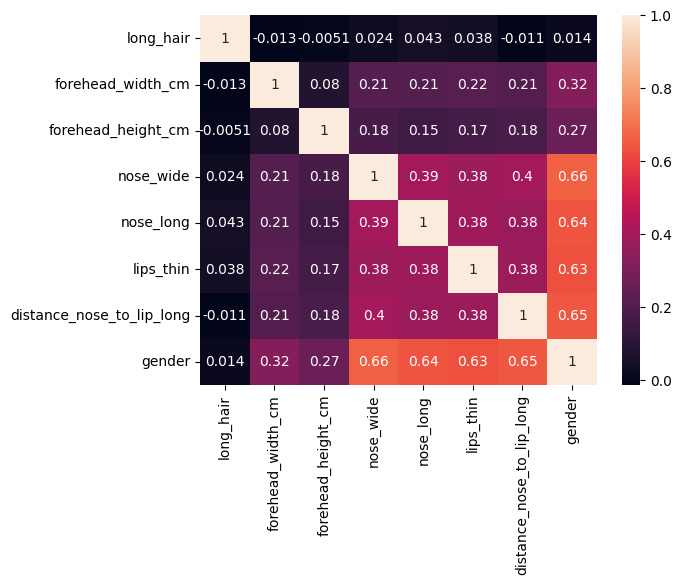

In [81]:
import seaborn as sns

sns.heatmap(corr, annot = True)

**histogram**

array([[<Axes: title={'center': 'forehead_width_cm'}>,
        <Axes: title={'center': 'forehead_height_cm'}>,
        <Axes: title={'center': 'nose_wide'}>],
       [<Axes: title={'center': 'nose_long'}>,
        <Axes: title={'center': 'lips_thin'}>,
        <Axes: title={'center': 'distance_nose_to_lip_long'}>],
       [<Axes: title={'center': 'gender'}>, <Axes: >, <Axes: >]],
      dtype=object)

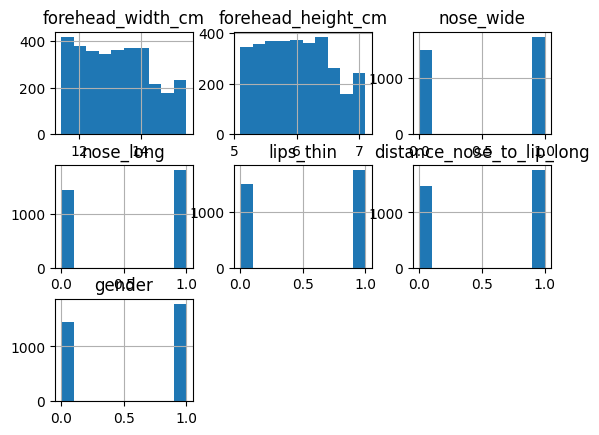

In [82]:
df[features].hist()

**Data**

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

min_max_scale = MinMaxScaler()
COLUMN_XS= ["forehead_width_cm", 
            "forehead_height_cm", 
            "nose_wide", 
            "nose_long", 
            "lips_thin", 
            "distance_nose_to_lip_long"]
DATA = min_max_scale.fit_transform(df[COLUMN_XS])

x_train, x_test, y_train, y_test = train_test_split(DATA, df.gender, test_size=0.1)

print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of x_train: (2909, 6)
Shape of y_train: (2909,)
Shape of x_test: (324, 6)
Shape of y_test: (324,)


**DEFINE MODEL**

In [84]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 100,
                          penalty = 'l2',
                          multi_class = 'ovr',
                          solver = "newton-cholesky")
model.fit(x_train, y_train)

LogisticRegression(multi_class='ovr', solver='newton-cholesky')

In [85]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,

In [86]:
y_test = np.array(y_test)
# y_test

**Reshape the arrays: Convert both y_pred and y_test**

In [87]:
y_pred = np.array(y_pred).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of y_pred: {y_pred.shape}")

Shape of y_test: (324, 1)
Shape of y_pred: (324, 1)


**Create comparison arrays**

In [88]:
is_true_positive = np.equal(y_pred, y_test).astype(int)
is_false_positive = np.equal(y_pred, 1) & np.equal(y_test, 0).astype(int)
is_true_negative = np.equal(y_pred, 0) & np.equal(y_test, 0).astype(int)
is_false_negative = np.equal(y_pred, 0) & np.equal(y_test, 1).astype(int)

# [[TP, FP],
#  [FN, FP]]
confusion_matrix = np.array([
    [np.sum(is_true_positive), np.sum(is_false_positive)],
    [np.sum(is_false_negative), np.sum(is_true_negative)]
])
confusion_matrix

array([[308,   9],
       [  7, 133]])

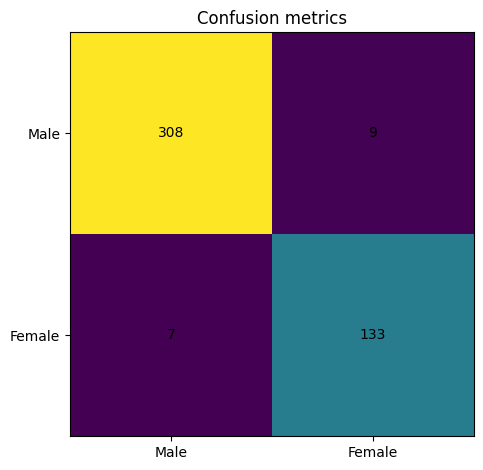

In [89]:
prediction = ["Male", "Female"]
ground_truth = ["Male", "Female"]
fig, axs = plt.subplots()
graph = axs.imshow(confusion_matrix)
axs.set_xticks(np.arange(len(ground_truth)), labels=ground_truth)
axs.set_yticks(np.arange(len(prediction)), labels=prediction)

# plt.setp(axs.get_xticklabels(), rotation=45, ha="right",
#          rotation_mode="anchor")

for i in range(len(prediction)):
    for j in range(len(ground_truth)):
        text = axs.text(j, i, confusion_matrix[i, j],
                       ha="center", va="center", color="black")
        
axs.set_title("Confusion metrics")
fig.tight_layout()
plt.show()

In [90]:
print(f"Accuracy: {(confusion_matrix[0, 0] + confusion_matrix[1, 1])/np.sum(confusion_matrix):.2f}")

Accuracy: 0.96
